In [1]:
import xarray as xr
import numpy as np
import glob as glob
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio
import numpy as np

In [8]:
file_paths = ["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/ocn/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.blom.hbgcm.20*.nc"]
for file_path in file_paths:
    list_files_def = glob.glob(file_path)
    list_files_def = sorted(list_files_def)
    datasets = []
    datasets1 = []

In [11]:
file_paths = ["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_BECCS_land_190124/ocn/hist/NSSP534frc2esm_f19_tn14_BECCS_land_190124.blom.hbgcm.20*.nc"]

for file_path in file_paths:
    list_files_def = glob.glob(file_path)
    list_files_def = sorted(list_files_def)
    datasets = []
    datasets1 = []

    for i in range(len(list_files_def)):
        dset_case_def = xr.open_dataset(list_files_def[i], decode_times=False)
        co2fxd = dset_case_def['co2fxd']
        co2fxu=dset_case_def['co2fxu']
        datasets.append(co2fxd)
        datasets1.append(co2fxu)
    combined_dataset_def = xr.concat(datasets, dim='time')
    combined_dataset1_def = xr.concat(datasets1, dim='time')
    


In [26]:
CO2flux=combined_dataset_def-combined_dataset1_def
CO2flux
start_date1 = '2029-01'
end_date1   = '2060-01'
time2 = pd.date_range(start=start_date1, end=end_date1, freq='M')
print(len(time2))
combined_dataset_def.time
CO2flux=CO2flux.assign_coords(time=time2)

#CO2flux_annual=CO2flux.resample(time='AS').avg(dim='time')

annual_means = CO2flux.groupby(CO2flux['time'].dt.year).mean(dim='time')


372


(array([6.240000e+02, 4.225600e+04, 9.214090e+05, 1.264668e+06,
        2.901410e+05, 1.310430e+05, 3.274400e+04, 4.570000e+03,
        4.260000e+02, 6.700000e+01]),
 array([-1.51484103e-09, -9.76454473e-10, -4.38067888e-10,  1.00318677e-10,
         6.38705255e-10,  1.17709176e-09,  1.71547843e-09,  2.25386487e-09,
         2.79225154e-09,  3.33063799e-09,  3.86902466e-09]),
 <BarContainer object of 10 artists>)

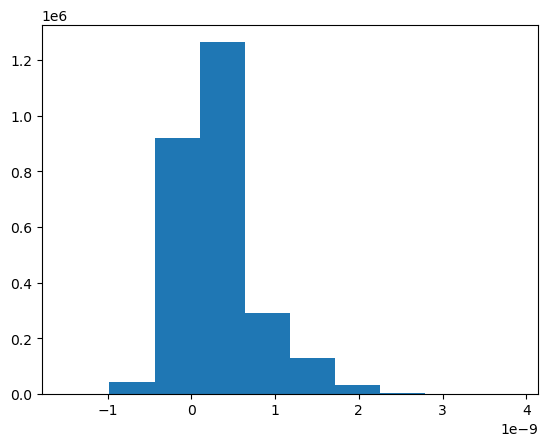

In [27]:
annual_means.plot()

<xarray.DataArray 'NPP' ()>
array(0.)

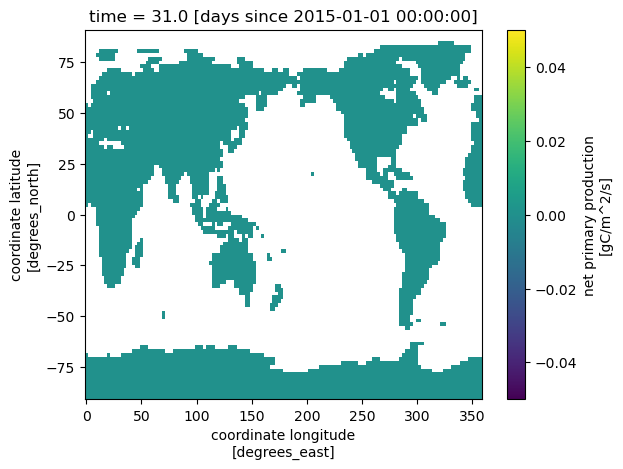

In [10]:
file1 = '/cluster/projects/nn9576k/anusha/ncdiff_jorgs/ncdiff_2040high_clm2_h0_NPP1.nc'
data = xr.open_dataset(file1, decode_times=False)
data.NPP.plot()
data.NPP.sum()



<xarray.DataArray 'TREFHT' ()>
array(0., dtype=float32)


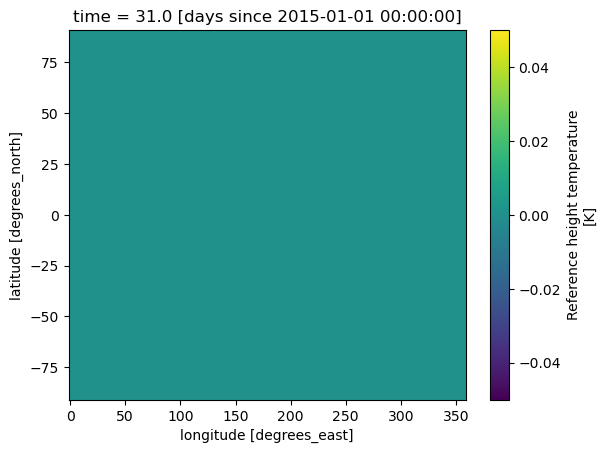

In [13]:
file1 = '/cluster/projects/nn9576k/anusha/ncdiff_jorgs/ncdiff_2040high_cam_h0_TREFHT1.nc'
data = xr.open_dataset(file1, decode_times=False)
data.TREFHT.plot()
print(data.TREFHT.mean())

#TREFHT=(data.TREFHT * data.gw).sum(dim='lat') / (data.gw.sum(dim='lat'))

In [14]:

file1 = '/cluster/projects/nn9576k/anusha/ncdiff_jorgs/ncdiff_2040high_blom.hm_sst1.nc'
data = xr.open_dataset(file1, decode_times=False)
data.sst.sum()



<xarray.DataArray 'sst' ()>
array(0., dtype=float32)